In [1]:
from IPython.display import display, HTML
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the ticker symbol and the date range
ticker_symbol = '^BVSP'  # Bovespa Index
start_date = '2023-06-10'
end_date = '2024-06-10'

# Download data
ibov_yf = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calcula o resultado percentual entre uma linha e outra
ibov_yf['<span style="color: yellow; font-weight: bold;">resultado_percent</span>'] = ibov_yf['Close'].pct_change() * 100
# Remove NaNs
ibov_yf = ibov_yf.dropna()

# Fazer uma cópia do DataFrame para evitar SettingWithCopyWarning
ibov_yf = ibov_yf.copy()

# Binning com pandas.cut: positivo/negativo
ibov_yf['<span style="color: yellow; font-weight: bold;">result_binario</span>'] = pd.cut(ibov_yf['<span style="color: yellow; font-weight: bold;">resultado_percent</span>'], bins=[-np.inf, 0, np.inf], labels=['negativo', 'positivo'])

# Binning com pandas.qcut: três categorias por quantis
ibov_yf['<span style="color: yellow; font-weight: bold;">tres_categ</span>'] = pd.qcut(ibov_yf['<span style="color: yellow; font-weight: bold;">resultado_percent</span>'], q=3, labels=['baixo', 'médio', 'alto'])

# Exibir HTML formatado para o cabeçalho do DataFrame
formatted_columns = {
    '<span style="color: yellow; font-weight: bold;">resultado_percent</span>': '<span style="color: yellow; font-weight: bold;">resultado_percent</span>',
    '<span style="color: yellow; font-weight: bold;">result_binario</span>': '<span style="color: yellow; font-weight: bold;">result_binario</span>',
    '<span style="color: yellow; font-weight: bold;">tres_categ</span>': '<span style="color: yellow; font-weight: bold;">tres_categ</span>'
}
html_columns = [formatted_columns.get(col, col) for col in ibov_yf.columns]
ibov_yf.columns = html_columns

# Exibir o DataFrame formatado
display(HTML(ibov_yf.head(10).to_html(escape=False)))
display(HTML(ibov_yf.tail(10).to_html(escape=False)))

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,resultado_percent,result_binario,tres_categ
Date,,,,,,,,,
2023-06-13,117337.0,117924.0,116363.0,116743.0,116743.0,12392200,-0.505386,negativo,baixo
2023-06-14,116753.0,119085.0,116745.0,119069.0,119069.0,16938600,1.992411,positivo,alto
2023-06-15,119068.0,119686.0,118693.0,119221.0,119221.0,12298000,0.127657,positivo,médio
2023-06-16,119208.0,119555.0,118487.0,118758.0,118758.0,15251700,-0.388354,negativo,médio
2023-06-19,118757.0,119939.0,118558.0,119858.0,119858.0,6776300,0.926253,positivo,alto
2023-06-20,119858.0,119858.0,118416.0,119622.0,119622.0,10924200,-0.196900,negativo,médio
2023-06-21,119623.0,120519.0,119332.0,120420.0,120420.0,11736700,0.667101,positivo,alto
2023-06-22,120420.0,120420.0,118018.0,118934.0,118934.0,11831500,-1.234014,negativo,baixo
2023-06-23,118959.0,119386.0,118178.0,118977.0,118977.0,12845400,0.036155,positivo,médio


,Open,High,Low,Close,Adj Close,Volume,resultado_percent,result_binario,tres_categ
Date,,,,,,,,,
2024-05-24,124731.0,125257.0,124259.0,124306.0,124306.0,9211500,-0.339135,negativo,médio
2024-05-27,124297.0,124535.0,124081.0,124496.0,124496.0,4327600,0.152849,positivo,médio
2024-05-28,124498.0,125392.0,123537.0,123780.0,123780.0,9179800,-0.575119,negativo,baixo
2024-05-29,123780.0,123780.0,122458.0,122707.0,122707.0,8257700,-0.866861,negativo,baixo
2024-05-31,122704.0,122837.0,121929.0,122098.0,122098.0,15918600,-0.496304,negativo,baixo
2024-06-03,122100.0,122495.0,121496.0,122032.0,122032.0,8428100,-0.054055,negativo,médio
2024-06-04,122032.0,122032.0,120878.0,121802.0,121802.0,8529300,-0.188475,negativo,médio
2024-06-05,121803.0,122170.0,121253.0,121407.0,121407.0,8768700,-0.324297,negativo,médio
2024-06-06,121408.0,123246.0,121377.0,122899.0,122899.0,8404200,1.228924,positivo,alto


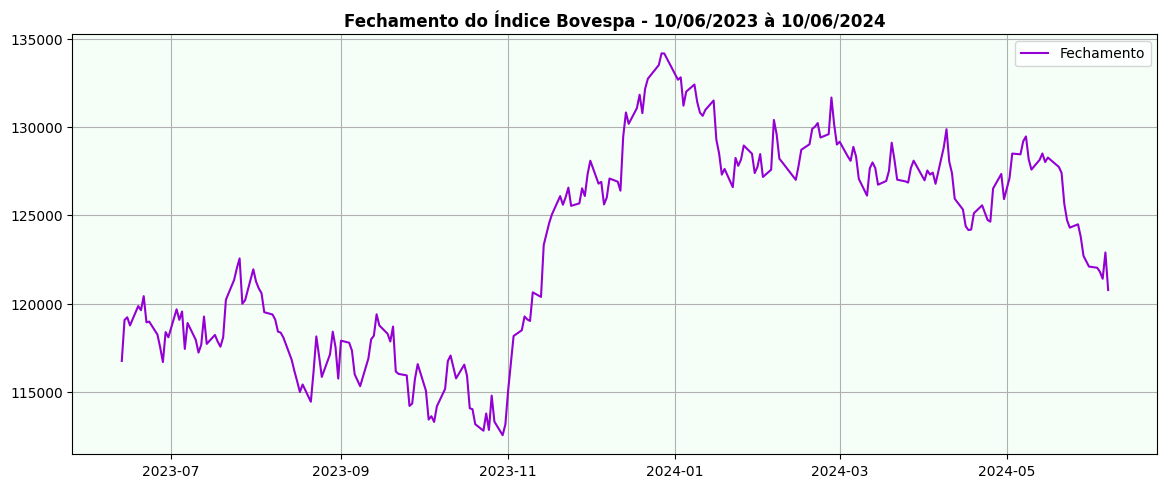

In [3]:
# Gráfico de linhas para o fechamento do índice
plt.figure(figsize=(14, 12))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(ibov_yf.index, ibov_yf['Close'], label='Fechamento', color='darkviolet')
ax1.set_title('Fechamento do Índice Bovespa - 10/06/2023 à 10/06/2024', fontweight='bold')
ax1.legend()
ax1.set_facecolor('#F5FFF8')  # Define o fundo cinza claro
ax1.grid(True)  # Ativa a grade

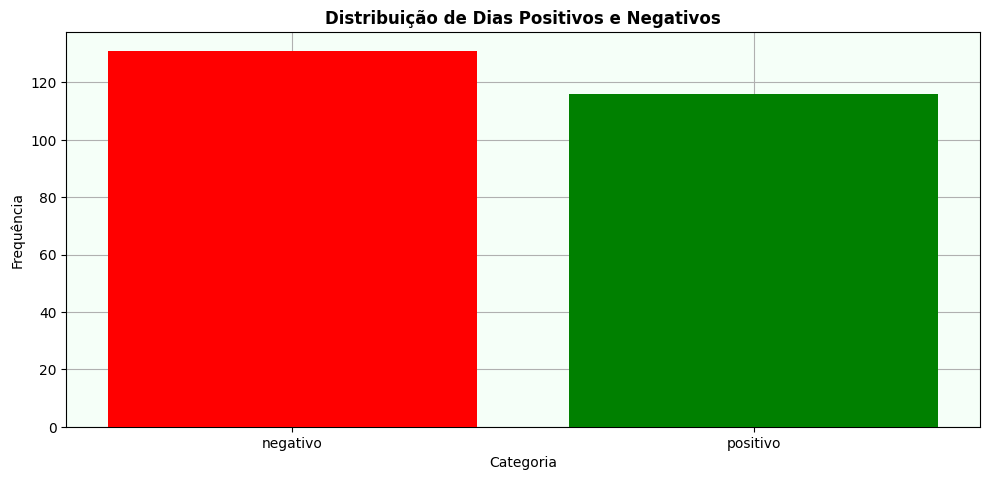

In [4]:
# Gráfico de barras para o binning binário
plt.figure(figsize=(10, 9))

ax2 = plt.subplot(2, 1, 2)
bin_counts = ibov_yf['<span style="color: yellow; font-weight: bold;">result_binario</span>'].value_counts()
bars = ax2.bar(bin_counts.index, bin_counts.values, color=['red', 'green'], zorder=5)
ax2.set_title('Distribuição de Dias Positivos e Negativos', fontweight='bold')
ax2.set_xlabel('Categoria')
ax2.set_ylabel('Frequência')

# Rotacionar os rótulos do eixo x
ax2.set_xticks(np.arange(len(bin_counts.index)))
ax2.set_xticklabels(bin_counts.index, rotation=0)
ax2.set_facecolor('#F5FFF8')  # Define o BG
ax2.grid(True)  # Ativa a grade

plt.tight_layout()
plt.show()

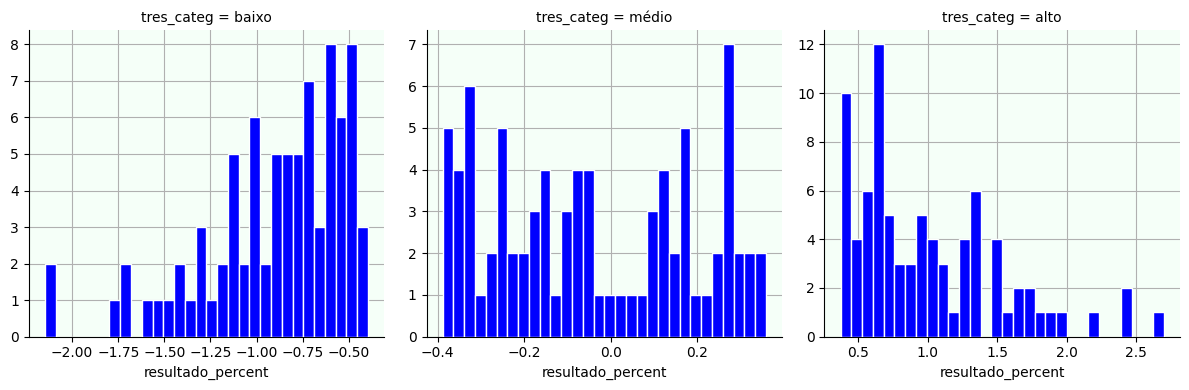

In [5]:
# Calcula o resultado percentual entre uma linha e outra
ibov_yf['resultado_percent'] = ibov_yf['Close'].pct_change() * 100
# Remove NaNs
ibov_yf = ibov_yf.dropna()

# Fazer uma cópia do DataFrame para evitar SettingWithCopyWarning
ibov_yf = ibov_yf.copy()

# Binning com pandas.qcut: três categorias por quantis
ibov_yf['tres_categ'] = pd.qcut(ibov_yf['resultado_percent'], q=3, labels=['baixo', 'médio', 'alto'])

# Inicializa uma grade de gráficos com um eixo para cada categoria de binning
grid = sns.FacetGrid(ibov_yf, col="tres_categ", col_wrap=3, height=4, sharex=False, sharey=False)

# Adiciona um fundo cinza claro a cada faceta antes de desenhar os histogramas
for ax in grid.axes.flatten():
    ax.set_facecolor('#F5FFF8')  # BG Color
    ax.grid(True)  # Ativa a grade

# Desenha um histograma em cada faceta para mostrar a distribuição dos retornos percentuais
grid.map(plt.hist, 'resultado_percent', bins=30, color='blue', edgecolor='white', zorder=5)

# Ajusta o layout dos gráficos
grid.figure.tight_layout()

# Mostra os gráficos
plt.show()